Część 1:

Analiza zmian zjawisk w czasie porządkuje informacje i pozwala na wyciągnięcie bardziej szczegółowych wniosków, np. trendów ze składowymi okresowymi.

Trend to tendencja rozwojowa, która wskazuje ogólny kierunek rozwoju zjawiska. Rozwój zjawiska rozumiany jest jako systematyczne zmiany, jakim podlega to zjawisko. Rozróżniany jest m.in. trend liniowy i nieliniowy.

Składowe okresowe to regularne odchylenia od trendu. Wahania cykliczne charakteryzują się długookresowymi, rytmicznymi odchyleniami. Wahania sezonowe są krótkookresowe i odzwierciedlają wpływ zachowań wynikający z kalendarza. 

Wyznacz średnią kroczącą i odchylenie standardowe kroczące (np. 7-dniowe), aby zobaczyć, jak te zjawiska zmieniają się w czasie. Obliczenia wykonaj dla:

1.1. liczby nowych zachorowań,

1.2. liczby nowych śmierci,

1.3. liczby nowych szczepień,

1.4. 2 innych różnych informacji, które uznasz za istotne.

Możesz przefiltrować dane, jeżeli uznasz to za potrzebne. Sprawdź, czy dla tych informacji można zaobserwować trendy (np. sezonowe wzorce lub cykle) i wahania. Przeanalizuj otrzymane wyniki. 

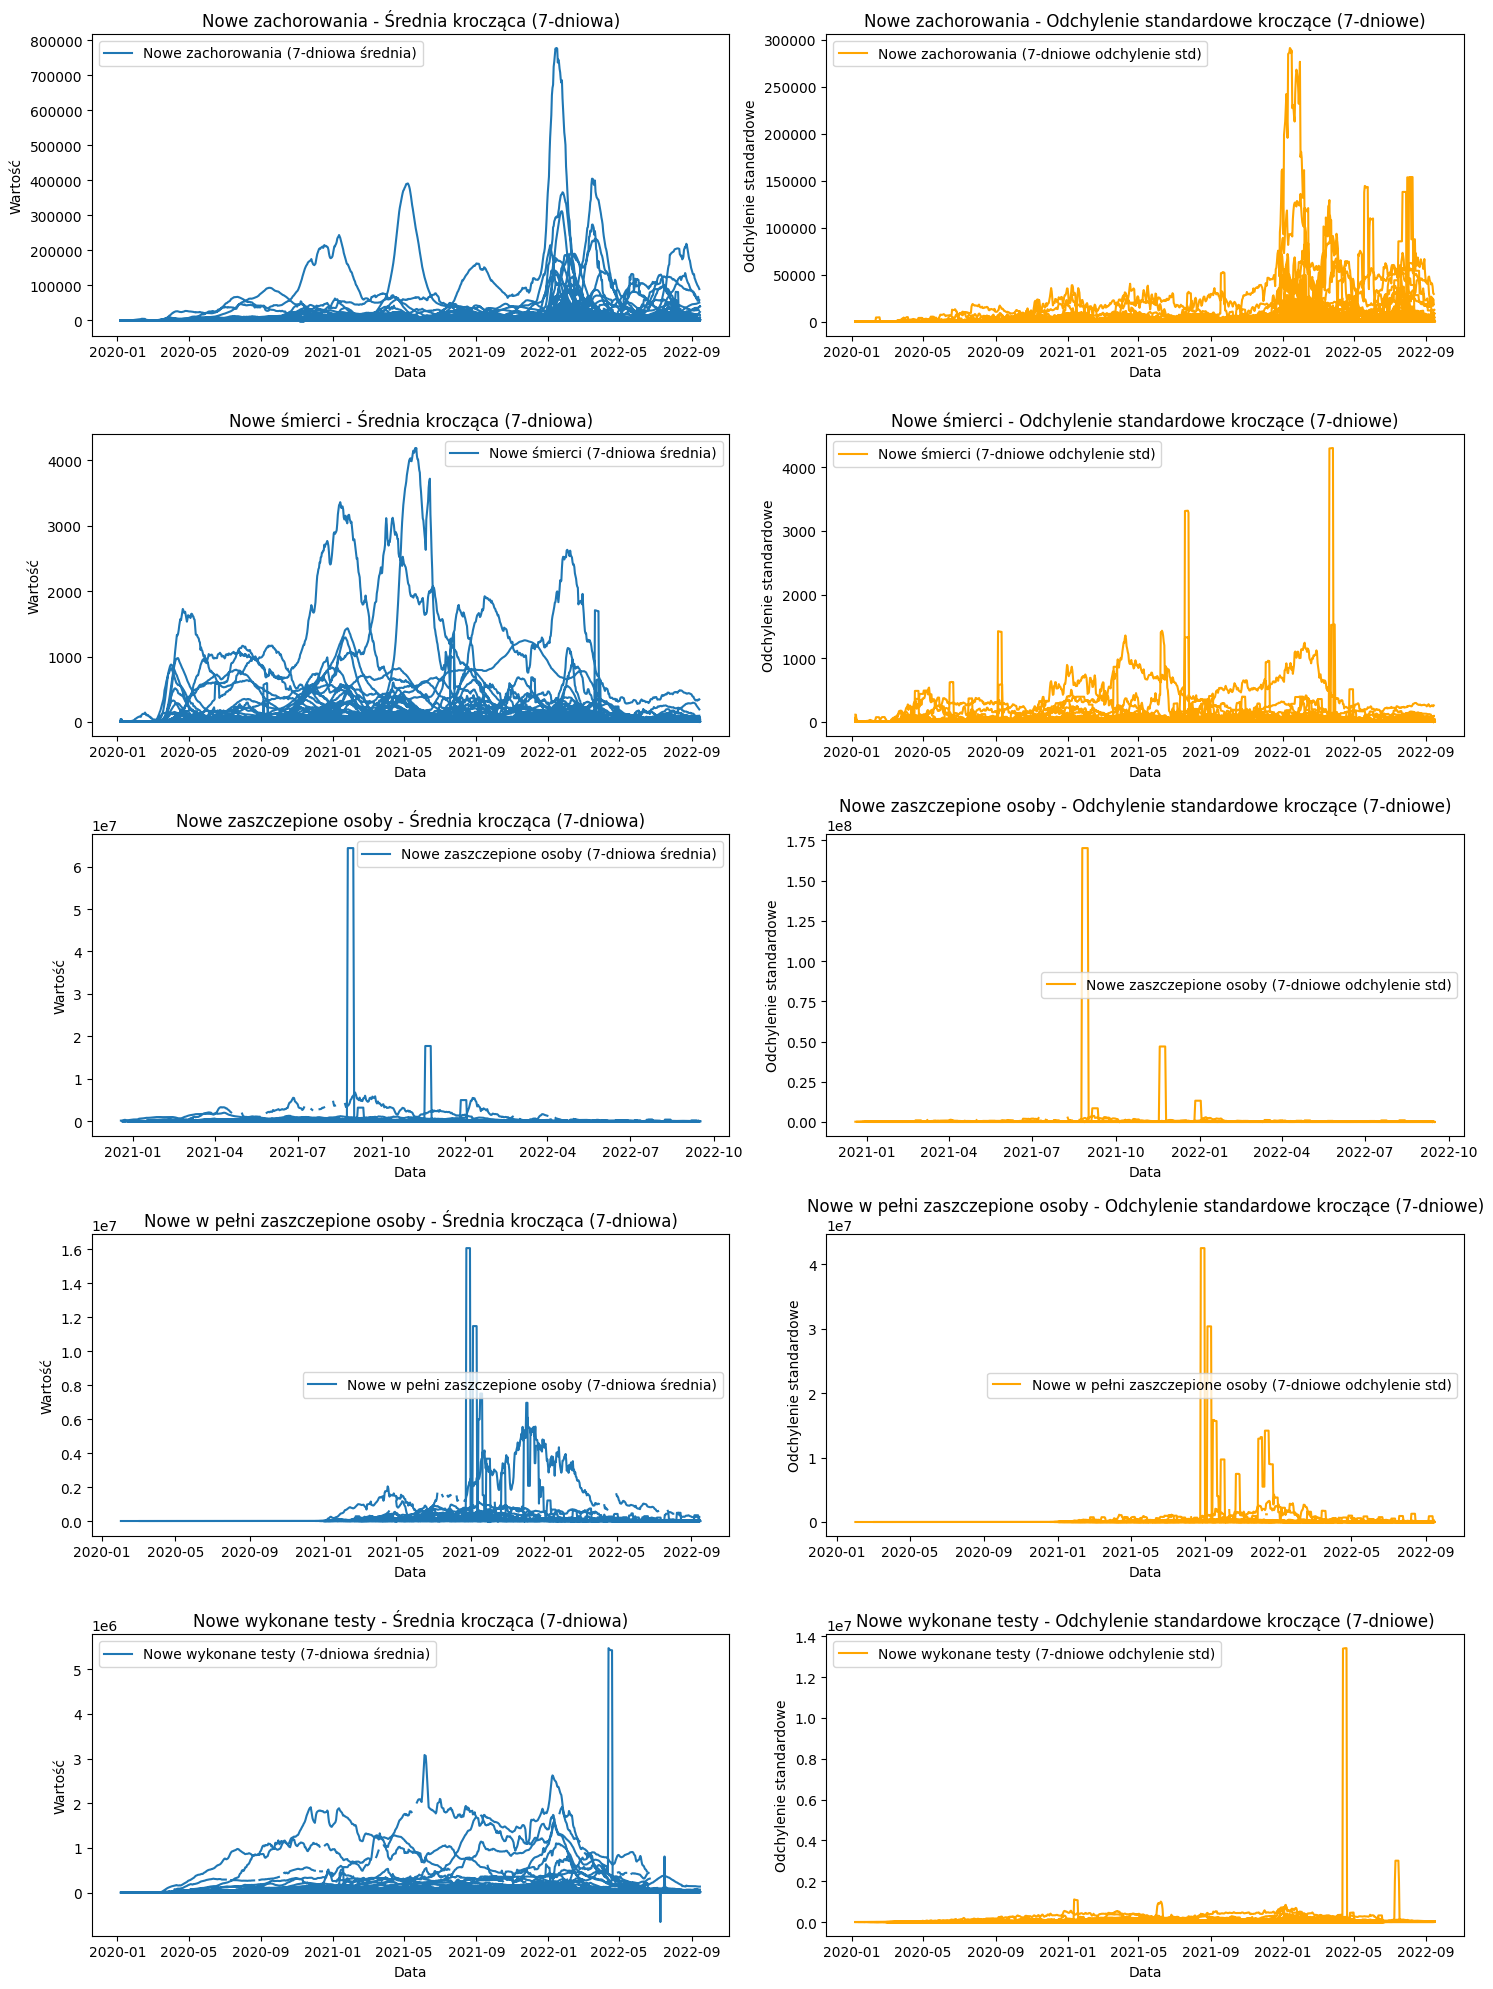

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

merged_covid_df = pd.read_csv('wyniki\\merged_5.csv')
merged_covid_df['date'] = pd.to_datetime(merged_covid_df['date'])
merged_covid_df.set_index('date', inplace=True)

rolling_window = 7


merged_covid_df['rolling_mean_new_confirmed'] = merged_covid_df['new_confirmed'].rolling(window=rolling_window).mean()
merged_covid_df['rolling_mean_new_deceased'] = merged_covid_df['new_deceased'].rolling(window=rolling_window).mean()
merged_covid_df['rolling_mean_new_persons_vaccinated'] = merged_covid_df['new_persons_vaccinated'].rolling(window=rolling_window).mean()
merged_covid_df['rolling_mean_new_tested'] = merged_covid_df['new_tested'].rolling(window=rolling_window).mean()
merged_covid_df['rolling_mean_new_persons_fully_vaccinated'] = merged_covid_df['new_persons_fully_vaccinated'].rolling(window=rolling_window).mean()

merged_covid_df['rolling_std_new_confirmed'] = merged_covid_df['new_confirmed'].rolling(window=rolling_window).std()
merged_covid_df['rolling_std_new_deceased'] = merged_covid_df['new_deceased'].rolling(window=rolling_window).std()
merged_covid_df['rolling_std_new_persons_vaccinated'] = merged_covid_df['new_persons_vaccinated'].rolling(window=rolling_window).std()
merged_covid_df['rolling_std_new_tested'] = merged_covid_df['new_tested'].rolling(window=rolling_window).std()
merged_covid_df['rolling_std_new_persons_fully_vaccinated'] = merged_covid_df['new_persons_fully_vaccinated'].rolling(window=rolling_window).std()

fig, axs = plt.subplots(5, 2, figsize=(15, 20))

metrics = [
    ('Nowe zachorowania', 'rolling_mean_new_confirmed', 'rolling_std_new_confirmed'),
    ('Nowe śmierci', 'rolling_mean_new_deceased', 'rolling_std_new_deceased'),
    ('Nowe zaszczepione osoby', 'rolling_mean_new_persons_vaccinated', 'rolling_std_new_persons_vaccinated'),
    ('Nowe w pełni zaszczepione osoby', 'rolling_mean_new_persons_fully_vaccinated', 'rolling_std_new_persons_fully_vaccinated'),
    ('Nowe wykonane testy', 'rolling_mean_new_tested', 'rolling_std_new_tested')
]

for i, (raw, mean, std) in enumerate(metrics):
    ax1 = axs[i, 0]
    ax2 = axs[i, 1]
    
    ax1.plot(merged_covid_df.index, merged_covid_df[mean], label=f'{raw} (7-dniowa średnia)')
    ax1.set_title(f'{raw.capitalize()} - Średnia krocząca (7-dniowa)')
    ax1.set_xlabel('Data')
    ax1.set_ylabel('Wartość')
    ax1.legend()
    
    ax2.plot(merged_covid_df.index, merged_covid_df[std], label=f'{raw} (7-dniowe odchylenie std)', color='orange')
    ax2.set_title(f'{raw.capitalize()} - Odchylenie standardowe kroczące (7-dniowe)')
    ax2.set_xlabel('Data')
    ax2.set_ylabel('Odchylenie standardowe')
    ax2.legend()

plt.tight_layout()
plt.show()

Część 2
Wykorzystaj do analizy trendów analizę szeregów czasowych (metoda średniej ruchomej czy inne modele autoregresyjne), która umożliwi zbadanie 5 przypadków rozważanych w części 1 poziomu 3. Przeanalizuj otrzymane wyniki

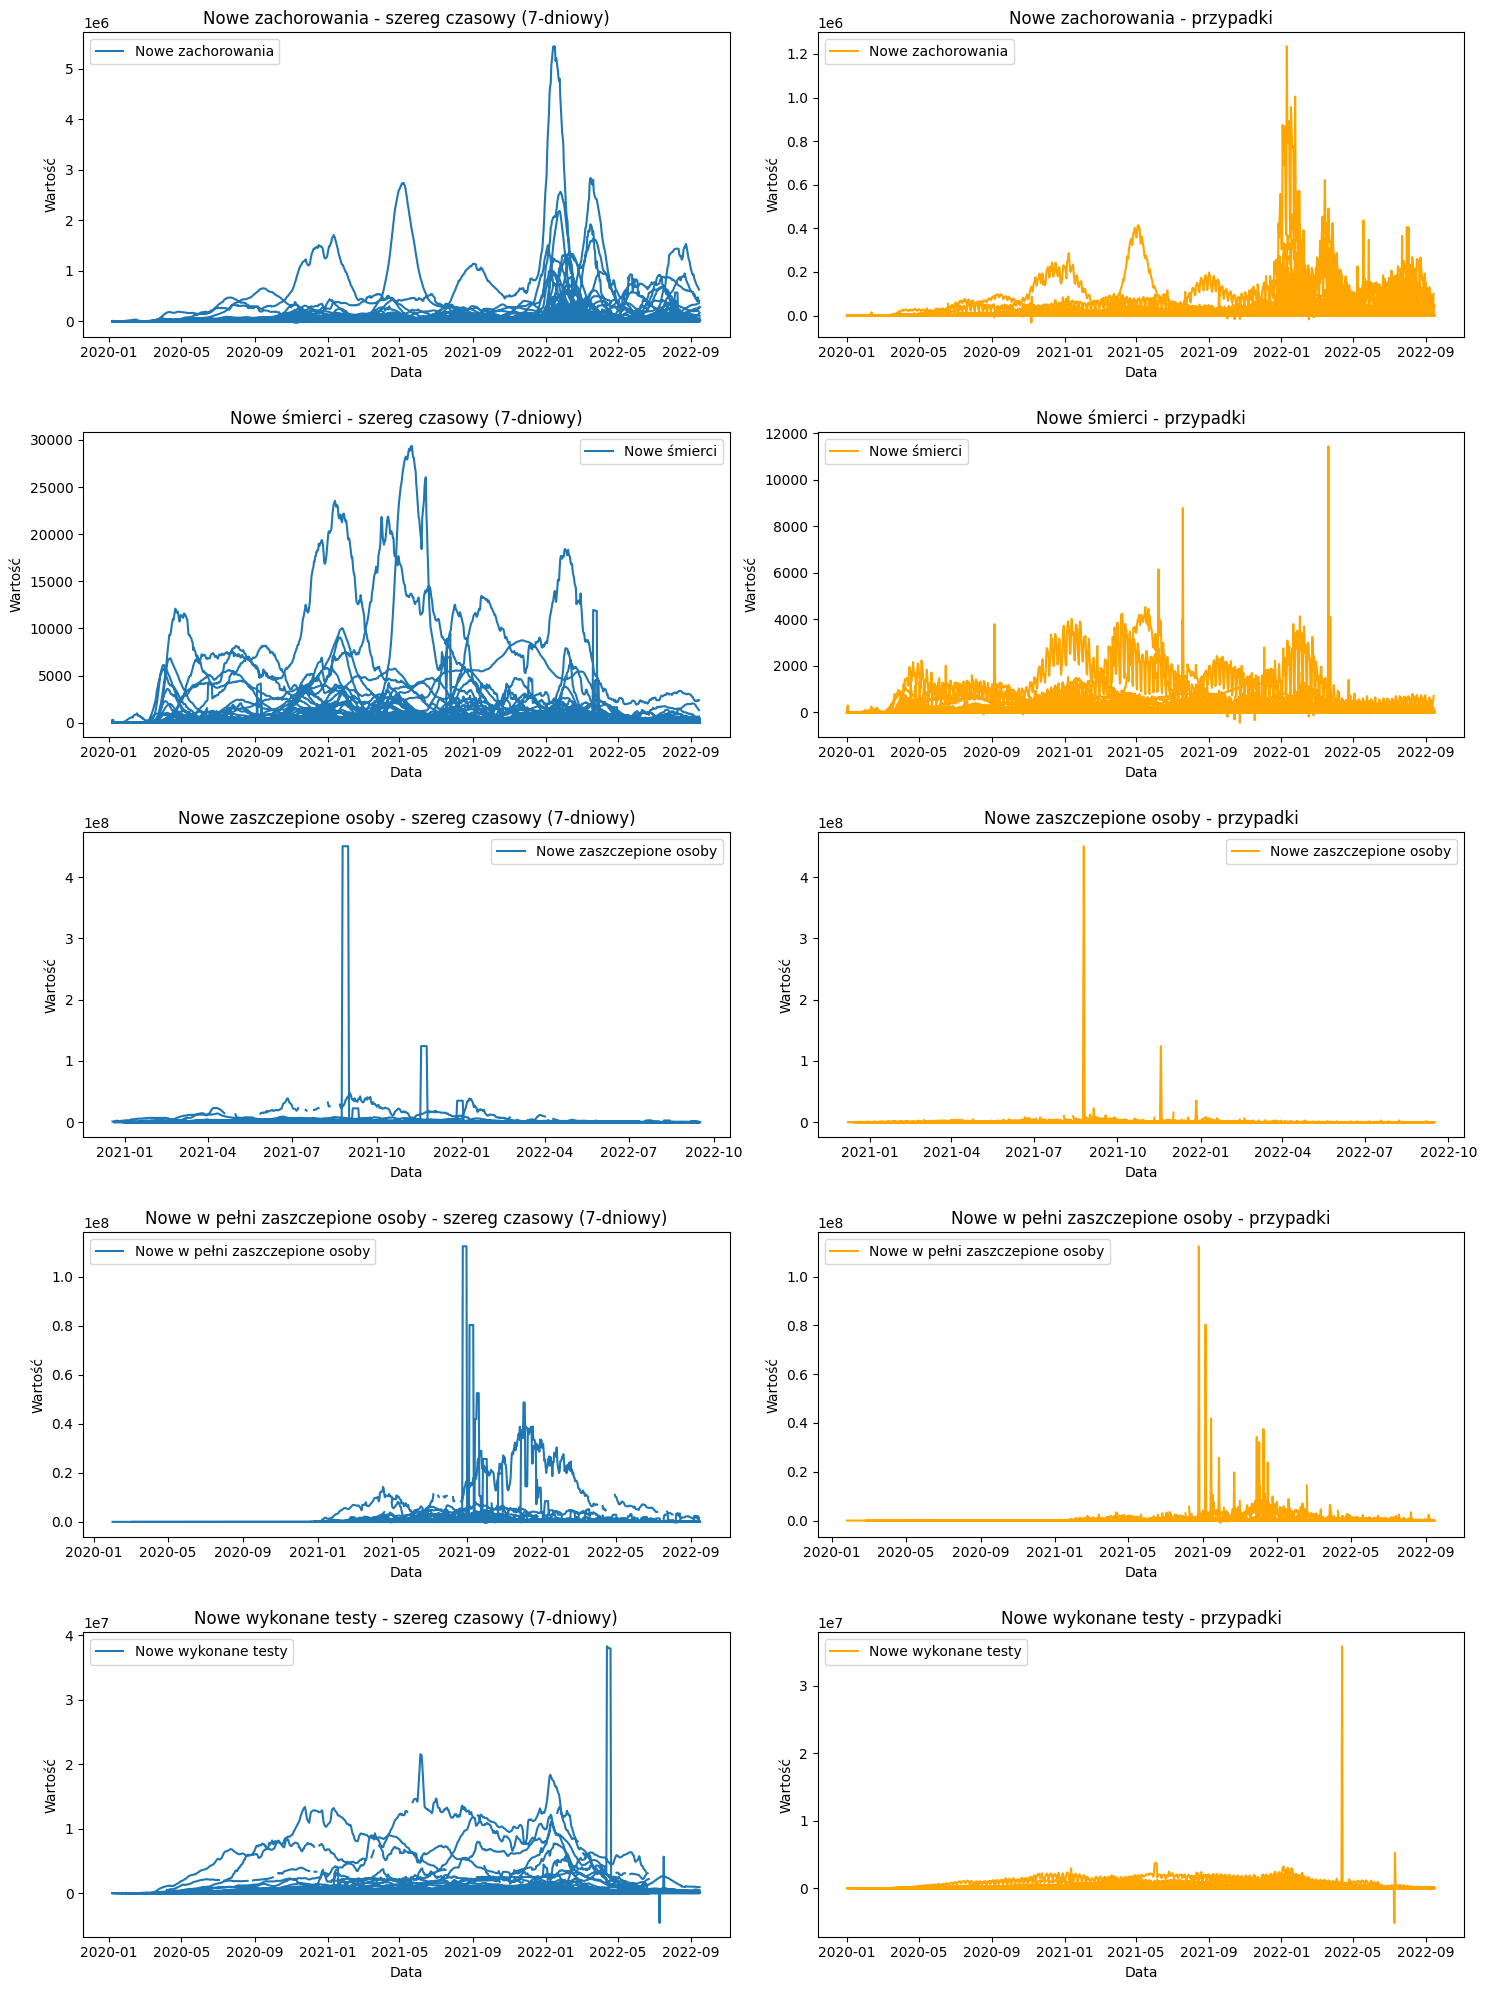

In [14]:
window_size = 7

# rolling_mean_new_confirmed = merged_covid_df['new_confirmed'].rolling(window=window_size).mean()
# rolling_mean_new_deceased = merged_covid_df['new_deceased'].rolling(window=window_size).mean()
# rolling_mean_new_persons_vaccinated = merged_covid_df['new_persons_vaccinated'].rolling(window=window_size).mean()
# rolling_mean_new_tested = merged_covid_df['new_tested'].rolling(window=window_size).mean()
# rolling_mean_new_persons_fully_vaccinated = merged_covid_df['new_persons_fully_vaccinated'].rolling(window=window_size).mean()

merged_covid_df['time_series_new_confirmed'] = merged_covid_df['new_confirmed'].rolling(window=rolling_window).mean()
merged_covid_df['time_series_new_deceased'] = merged_covid_df['new_deceased'].rolling(window=rolling_window).mean()
merged_covid_df['time_series_persons_vaccinated'] = merged_covid_df['new_persons_vaccinated'].rolling(window=rolling_window).mean()
merged_covid_df['time_series_new_tested'] = merged_covid_df['new_tested'].rolling(window=rolling_window).mean()
merged_covid_df['time_series_new_persons_fully_vaccinated'] = merged_covid_df['new_persons_fully_vaccinated'].rolling(window=rolling_window).mean()


fig, axs = plt.subplots(5, 2, figsize=(15, 20))

metrics = [
    ('Nowe zachorowania', 'time_series_new_confirmed', 'new_confirmed'),
    ('Nowe śmierci', 'time_series_new_deceased', 'new_deceased'),
    ('Nowe zaszczepione osoby', 'time_series_persons_vaccinated', 'new_persons_vaccinated'),
    ('Nowe w pełni zaszczepione osoby', 'time_series_new_persons_fully_vaccinated', 'new_persons_fully_vaccinated'),
    ('Nowe wykonane testy', 'time_series_new_tested', 'new_tested')
]

for i, (raw, time_series, value) in enumerate(metrics):
    ax1 = axs[i, 0]
    ax2 = axs[i, 1]
    
    ax1.plot(merged_covid_df.index, merged_covid_df[time_series], label=f'{raw}')
    ax1.set_title(f'{raw.capitalize()} - Szereg czasowy (7-dniowa)')
    ax1.set_xlabel('Data')
    ax1.set_ylabel('Wartość')
    ax1.legend()
    
    ax2.plot(merged_covid_df.index, merged_covid_df[value], label=f'{raw}', color='orange')
    ax2.set_title(f'{raw.capitalize()} - Wartości oryginalne')
    ax2.set_xlabel('Data')
    ax2.set_ylabel('Odchylenie standardowe')
    ax2.legend()

plt.tight_layout()
plt.show()

# plt.figure(figsize=(15, 10))
# plt.subplot(2, 1, 1)
# plt.plot(merged_covid_df['new_confirmed'], label='Oryginalne dane')
# plt.plot(rolling_mean_new_confirmed, label='Średnia ruchoma', color='red')
# plt.title('New confirmed - szereg czasowy metodą średniej ruchomej')
# plt.xlabel('Data')
# plt.ylabel('Wartość')
# plt.legend()
# plt.show()
# 
# 
# plt.figure(figsize=(15, 10))
# plt.subplot(2, 1, 1)
# plt.plot(merged_covid_df['new_deceased'], label='Oryginalne dane')
# plt.plot(rolling_mean_new_deceased, label='Średnia ruchoma', color='red')
# plt.title('New deceased - szereg czasowy metodą średniej ruchomej')
# plt.xlabel('Data')
# plt.ylabel('Wartość')
# plt.legend()
# plt.show()
# 
# plt.figure(figsize=(15, 10))
# plt.subplot(2, 1, 1)
# plt.plot(merged_covid_df['new_persons_vaccinated'], label='Oryginalne dane')
# plt.plot(rolling_mean_new_persons_vaccinated, label='Średnia ruchoma', color='red')
# plt.title('New persons vaccinated - szereg czasowy metodą średniej ruchomej')
# plt.xlabel('Data')
# plt.ylabel('Wartość')
# plt.legend()
# plt.show()
# 
# plt.figure(figsize=(15, 10))
# plt.subplot(2, 1, 1)
# plt.plot(merged_covid_df['new_tested'], label='Oryginalne dane')
# plt.plot(rolling_mean_new_tested, label='Średnia ruchoma', color='red')
# plt.title('New tested - szereg czasowy metodą średniej ruchomej')
# plt.xlabel('Data')
# plt.ylabel('Wartość')
# plt.legend()
# plt.show()
# 
# plt.figure(figsize=(15, 10))
# plt.subplot(2, 1, 1)
# plt.plot(merged_covid_df['new_persons_fully_vaccinated'], label='Oryginalne dane')
# plt.plot(rolling_mean_new_persons_fully_vaccinated, label='Średnia ruchoma', color='red')
# plt.title('New persons fully vaccinated - szereg czasowy metodą średniej ruchomej')
# plt.xlabel('Data')
# plt.ylabel('Wartość')
# plt.legend()
# plt.show()


Część 3
Przygotuj dane treningowe w interesującym Cię okresie czasu (np. druga połowa 2020 roku i pierwsza połowa 2021 roku, tj. 52 tygodnie = X) oraz ewentualne dane testowe. Możesz przefiltrować dane także po innych kryteriach, jeżeli uznasz to za potrzebne. Zastosuj analizę regresji, aby przewidzieć wartości w kolejnych X tygodniach następujących po wybranym okresie treningowym. Użyj modelu regresji liniowej, gdzie zmienną niezależną będzie czas, a zmienną zależną:

3.1. liczba nowych zachorowań,

3.2. liczba nowych śmierci,

3.3. liczba nowych szczepień,

3.4. 2 inne różne informacje, które uznasz za istotne.

Przeanalizuj otrzymane wyniki.

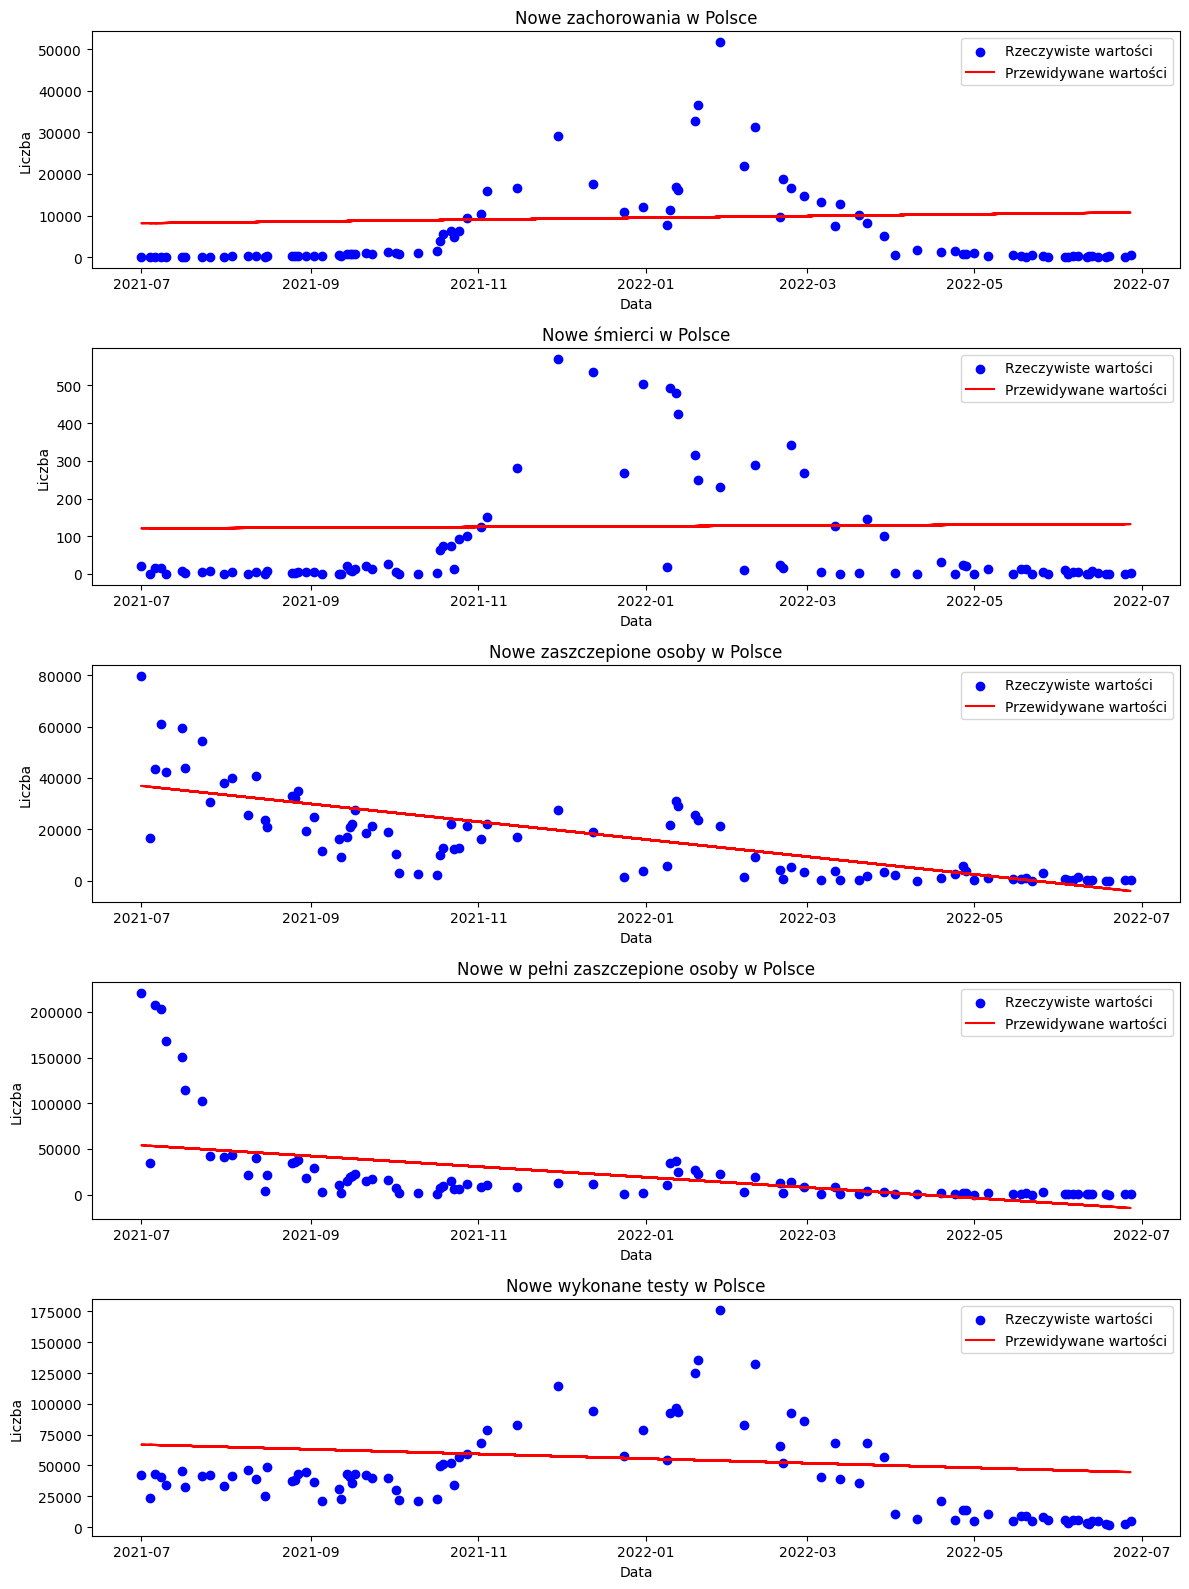

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def linear_regression_prediction(X_train, y_train, X_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return predictions

merged_covid_df = pd.read_csv('wyniki\\merged_5.csv')
merged_covid_df['date'] = pd.to_datetime(merged_covid_df['date'])

df_poland = merged_covid_df[(merged_covid_df['country_name'] == 'Poland') & 
                            (merged_covid_df['date'] >= '2021-07-01') & 
                            (merged_covid_df['date'] <= '2022-06-30')]

X = np.arange(len(df_poland)).reshape(-1, 1) 

metrics = {
    'Nowe zachorowania': 'new_confirmed',
    'Nowe śmierci': 'new_deceased',
    'Nowe zaszczepione osoby': 'new_persons_vaccinated',
    'Nowe w pełni zaszczepione osoby': 'new_persons_fully_vaccinated',
    'Nowe wykonane testy': 'new_tested'
}

fig, axes = plt.subplots(len(metrics), 1, figsize=(12, 16))

for i, (label, column) in enumerate(metrics.items()):
    y_values = df_poland[column].values
    X_train, X_test, y_train, y_test = train_test_split(X, y_values, random_state=42)
    
    predictions = linear_regression_prediction(X_train, y_train, X_test)
    
    X_test_dates = df_poland.iloc[X_test.flatten()]['date'].values
    
    axes[i].scatter(X_test_dates, y_test, color='blue', label='Rzeczywiste wartości')
    axes[i].plot(X_test_dates, predictions, color='red', label='Przewidywane wartości')
    axes[i].set_title(f'{label.replace("_", " ").capitalize()} w Polsce')
    axes[i].set_xlabel('Data')
    axes[i].set_ylabel('Liczba')
    axes[i].legend()

plt.tight_layout()
plt.show()